# **Introduction**

- In this notebook we will learn to understand and work on some of the use cases provided by the Goto Impact Foundation. Our goal is to extract insight through data exploration focusing on some metrics.

- We are going to use `GG3 finals python dataset stackoverflow.csv` for this module.

- The dataset can be obtained from this link:
  [GG3 finals python dataset stackoverflow.csv](https://drive.google.com/file/d/1bUDRn8pll93B9kMhqqFqfHJ2dYrYsEil/view)

In [ ]:
# NAME            : SARDIWAN PUTRA SIMAMORA
# PARTICIPANT ID  : GG3DAUP0082
# DATE            : 12 AUGUST 2023
# PURPOSE         : FINAL EXAM TEST

# **Import Libraries**

In [ ]:
import csv
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# **Mounting to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Import Data**

In [ ]:
# Load dataframe
data = pd.read_csv("/content/drive/MyDrive/data/GG3 finals python dataset stackoverflow.csv")
df = pd.DataFrame(data)

In [ ]:
# Show 5 data
df.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000 UTC,1.0,1.0,False
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000 UTC,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000 UTC,6.0,0.0,True


# **Part 01: Data Cleaning & Pre-processing**

## Check for Duplicates

- We can find duplicates in the dataset using `duplicated()` function.

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6790    False
6791    False
6792    False
6793    False
6794    False
Length: 6795, dtype: bool

- I try to use `subset=` parameter to find duplicates based on `question_id`, `question_owner_user_id` ,`question_tag`, `answer_id`, and `answerer_user_id`.

- This combination will be important later to find specific details.

In [ ]:
  # Find duplicates based on columns combination: question_id, question_owner_user_id ,question_tag, answer_id, and answerer_user_id
  column_subset = ['question_id', 'question_tag', 'answer_id', 'answerer_user_id']
  duplicate_rows = df[df.duplicated(subset=column_subset, keep=False)]

- Try to take a peek on the duplicates based on columns combination: question_id, question_owner_user_id ,question_tag, answer_id, and answerer_user_id.

- Why are they duplicated? Is it pure data duplication (an error) or could there be other explanation?

In [ ]:
duplicate_rows

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer


- It turns out that after using subsets, there is no duplicate data

## **Check Unique Values**

- Check unique values of some columns using `.unique()` and `.value_counts()` function

In [ ]:
# Check unique values of `question_score` column
df['question_score'].unique()

array([  1,   0,   3,   2,  10,   4,   8,  11,  -1,   7,   6,   5,  17,
        21,  -6,  12,  13,  -5,  39,  15,  28,  22,  31,  14,  25,   9,
        32,  30,  24,  19,  58,  18,  23,  57,  16,  61,  -2,  26,  20,
        82,  41, 104,  -3,  34,  54,  98,  46,  51])

In [ ]:
# value counts
df['question_score'].nunique()

48

In [ ]:
# Check unique values of `question_tag` column
df['question_tag'].unique()

array(['bq', 'data-studio', 'looker'], dtype=object)

In [ ]:
# value counts
df['question_tag'].nunique()

3

In [ ]:
# Check unique values of `answer_score` column
df['answer_score'].unique()

array([  1.,   0.,   6.,   2.,   3.,   4.,  20.,  16.,   5.,   7.,  23.,
        nan,  -3.,  11.,   9.,   8.,  -1.,  10.,  24.,  26.,  14.,  27.,
        -2.,  48.,  40.,  18.,  43.,  28.,  12.,  30.,  50.,  -8.,  25.,
        13.,  55.,  35.,  29.,  15.,  -5.,  47.,  36., 123.,  19.,  32.,
        96.,  49.,  22.,  21.,  -4.,  51.,  31.,  84.,  41.,  59.,  17.,
        34., 121.,  45., 131., 104.,  42.,  66., 102., 156.,  -6.,  38.,
        58.,  86.,  39.,  60.])

In [ ]:
# value counts
df['answer_score'].nunique()

69

In [ ]:
# Check unique values of `answer_comment_count` column
df['answer_comment_count'].unique()

array([ 1.,  2.,  0.,  3.,  9.,  7.,  5.,  4., nan,  6.,  8., 10., 13.,
       15., 11., 14., 17., 12., 21., 16., 19., 18.])

In [ ]:
# value counts
df['answer_comment_count'].nunique()

21

- Chcek for missing value using `.isna()` or `.isnull()` function

In [ ]:
# Check for missing values
df.isnull()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6791,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6792,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6793,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Count for missing values
df.isnull().sum()

question_id                   0
question_owner_user_id       34
question_owner_location    4025
question_title                0
question_body                 0
question_created_date         0
question_score                0
question_tag                  0
answer_id                   402
answerer_user_id            410
answer_created_date         402
answer_score                402
answer_comment_count        402
is_accepted_answer            0
dtype: int64

For a further explanation of why a missing value occurs, here I try to explain why it can happen.

> `question_owner_user_id` : The data in this column is empty, because the user who asked the question did not go through the login process before asking a question

> `question_owner_location` : The data in this column is empty, because the user didn't complete the profile first or didn't log in first when he wanted to ask a question

> `answer_id`, `answer_created_date`, `answer_score` and `answer_comment_count`:  The data in this column is empty, because the question doesn't have an answer yet

> `answerer_user_id` : The data in this column is empty, because the user answering the question does not go through the login process




## **Dealing With Missing Values**


The most possible thing now is to fill in a value of 0 in the question_owner_user_id column and leave the value of nan in another column

In [ ]:
df['question_owner_user_id'].fillna(0, inplace=True)

## **Data Transformation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   question_id              6795 non-null   int64  
 1   question_owner_user_id   6795 non-null   float64
 2   question_owner_location  2770 non-null   object 
 3   question_title           6795 non-null   object 
 4   question_body            6795 non-null   object 
 5   question_created_date    6795 non-null   object 
 6   question_score           6795 non-null   int64  
 7   question_tag             6795 non-null   object 
 8   answer_id                6393 non-null   float64
 9   answerer_user_id         6385 non-null   float64
 10  answer_created_date      6393 non-null   object 
 11  answer_score             6393 non-null   float64
 12  answer_comment_count     6393 non-null   float64
 13  is_accepted_answer       6795 non-null   bool   
dtypes: bool(1), float64(5), 

In [ ]:
df['question_owner_user_id'] = df['question_owner_user_id'].astype(int)

In [ ]:
df['question_created_date'] = pd.to_datetime(df['question_created_date'])

In [ ]:
df['answer_created_date'] = pd.to_datetime(df['answer_created_date'])

>For now, we can only do data transformation on 3 columns and for other columns in the form of floats they cannot be converted to integers because there are still null or infinite values, we will think about the next steps if the null value is needed to be filled

## **Checking for Outliers**


- Stakeholders inform us that we need to check if we need to exclude outliers based on question_score and answer_score. To do this, we need to explore the distribution of the question_score and answer_score column.


- For the first step, get qucik statistic of the `question_score` and `answer_score` column using `.describe()`



In [ ]:
# Get quick statistict of the column `question_score`
df['question_score'].describe()

count    6795.000000
mean        3.128477
std         6.916284
min        -6.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       104.000000
Name: question_score, dtype: float64

- Use `np.percentile()` to get 5th and 95th percentile

In [ ]:
# Get the average value
print("average question_score : ", np.mean(df["question_score"]))

# Get the 5th, 50th, and 95th percentile value of question_score
print("5th percentile : ", np.percentile(df["question_score"], 5))
print("50th percentile : ", np.percentile(df["question_score"], 50))
print("95th percentile : ", np.percentile(df["question_score"], 95))

average question_score :  3.128476821192053
5th percentile :  0.0
50th percentile :  1.0
95th percentile :  12.0


- Now we should check the distribution visually by creating a histogram for the `question_score` column.

- I choose to use `seaborn`

- How much data do you think we will lose if we filter out `age < 5th percentile` and `age > 95th percentile`. Is it worth the filter?


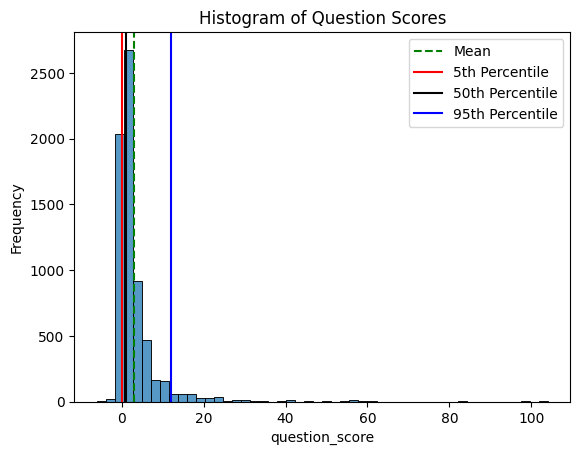

In [ ]:
# Create histogram for the `question_score` column

fig, ax =  plt.subplots()
sns.histplot(data = df, x = 'question_score',  bins = 50)

# Put a line for average value
ax.axvline(x=np.mean(df["question_score"]), c="green", linestyle="--", label="Mean")

# Put a line for 5th, 50th, and 95th percentile value
ax.axvline(x=np.percentile(df["question_score"], 5), c = "red", linestyle = "-", label="5th Percentile")
ax.axvline(x=np.percentile(df["question_score"], 50), c = "black", linestyle = "-", label="50th Percentile")
ax.axvline(x=np.percentile(df["question_score"], 95), c = "blue", linestyle = "-", label="95th Percentile")

ax.legend()
ax.set_xlabel("question_score")
ax.set_ylabel("Frequency")
plt.title("Histogram of Question Scores")

# Show the plot
plt.show()

To understand more deeply about the outliers in our data, we will try to use a boxplot

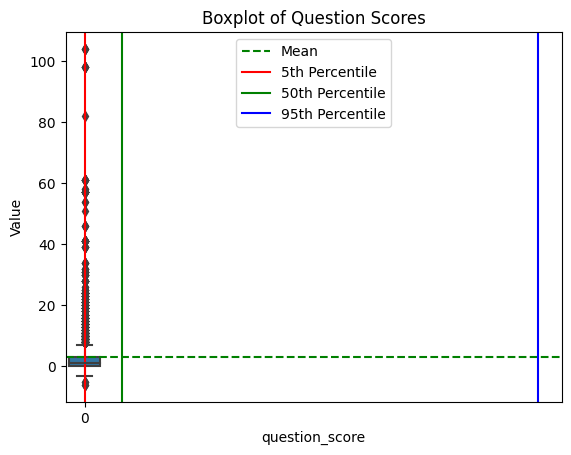

In [ ]:
fig, ax = plt.subplots()

# Plot the boxplot and hide the outliers for better visibility
sns.boxplot(df["question_score"])

# Put a line for average value
ax.axhline(y=np.mean(df["question_score"]), c="green", linestyle="--", label="Mean")

# Put a line for 5th, and 95th percentile value
ax.axvline(x=np.percentile(df["question_score"], 5), c="red", linestyle="-", label="5th Percentile")
ax.axvline(x=np.percentile(df["question_score"], 50), c="green", linestyle="-", label="50th Percentile")
ax.axvline(x=np.percentile(df["question_score"], 95), c="blue", linestyle="-", label="95th Percentile")

ax.legend()

ax.set_xlabel("question_score")
ax.set_ylabel("Value")
plt.title("Boxplot of Question Scores")

# Show the plot
plt.show()

- There seems to be no evidence that outliers will interfere with our analysis because:
     1. Outliers are not too skewed in the data distribution. This can be seen by comparing the median and average values. For a more precise confirmation of this, we can further check the skewness value.
     2. There are many outliers, but most of the data can still be considered normally distributed. we may miss important information if we decide to filter out the outliers.

In [ ]:
skewness = df['question_score'].skew()
print("Skewness:", skewness)

Skewness: 6.781487957208595


> 1. The skewness of 6.781487957208595 indicates that the distribution of the data has a long tail that is strongly inclined to the right (positive). Skewness is a statistical measure that describes the extent to which the distribution of data deviates from a normal or symmetrical distribution.

>2. In this context, a very positive skewness value (more than 1 or 2) indicates that most of the data values are around low values, whereas there are some very high values which lead to long tails on the right of the distribution. This could also mean that the distribution of the data tends to be skewed towards higher values.

>3. For the score itself, which is very unequal between the highest and lowest scores, this indicates that there are several questions of very poor quality with a minus score of up to 10 or 20, and there are several questions with very good quality with scores reaching more than 90

# **Part 02: Use Cases**

## **Use case 1**


`Marketing by Topic`

> Marketing team have an OKR where they need to create lots
of digital banner to attract people get into Stack Overflow.
They have an idea to create topic-based marketing. The
idea is to show how many relevant question there is in the
platform to people's needs.They want to show example question asked in the platform and show how many questions have been asked in the platform so far.

>Your manager asks you to create the metrics calculation as
needed then show it into line chart where each tag (topic)
has a chart. A single line would represent year the question
is asked. The trend should be on monthly basis.
Metrics: unique questions per month per year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   question_id              6795 non-null   int64              
 1   question_owner_user_id   6795 non-null   int64              
 2   question_owner_location  2770 non-null   object             
 3   question_title           6795 non-null   object             
 4   question_body            6795 non-null   object             
 5   question_created_date    6795 non-null   datetime64[ns, UTC]
 6   question_score           6795 non-null   int64              
 7   question_tag             6795 non-null   object             
 8   answer_id                6393 non-null   float64            
 9   answerer_user_id         6385 non-null   float64            
 10  answer_created_date      6393 non-null   datetime64[ns, UTC]
 11  answer_score             6393 

In [ ]:
# use only the required columns
df_1 = df.loc[:, ['question_id', 'question_tag', 'question_created_date']]

In [ ]:
# show first 5 data
df_1.head()

,question_id,question_tag,question_created_date
0,27733458,bq,2015-01-01 18:31:22.693000+00:00
1,27734669,bq,2015-01-01 21:04:30.070000+00:00
2,27745803,bq,2015-01-02 17:09:50.047000+00:00
3,27745803,bq,2015-01-02 17:09:50.047000+00:00
4,27748870,bq,2015-01-02 21:38:00.870000+00:00


In [ ]:
# find duplicates
duplicate_rows_df_1 = df_1[df_1.duplicated()]
duplicate_rows_df_1

,question_id,question_tag,question_created_date
3,27745803,bq,2015-01-02 17:09:50.047000+00:00
5,27748870,bq,2015-01-02 21:38:00.870000+00:00
7,27756994,bq,2015-01-03 16:36:14.057000+00:00
9,27784743,bq,2015-01-05 17:32:14.280000+00:00
11,27788344,bq,2015-01-05 21:38:32.263000+00:00
...,...,...,...
6782,47998766,bq,2017-12-27 21:19:55.587000+00:00
6784,48000058,bq,2017-12-28 00:10:13.330000+00:00
6790,48031187,data-studio,2017-12-30 05:14:38.143000+00:00
6791,48031187,data-studio,2017-12-30 05:14:38.143000+00:00


In [ ]:
# Find duplicates based on columns combination: question_id, question_tag, question_created_date
column_subset = ['question_id', 'question_tag', 'question_created_date']
duplicate_rows = df_1[df_1.duplicated(subset=column_subset, keep=False)]

In [ ]:
# take a peek on the duplicate cases
duplicate_rows

,question_id,question_tag,question_created_date
2,27745803,bq,2015-01-02 17:09:50.047000+00:00
3,27745803,bq,2015-01-02 17:09:50.047000+00:00
4,27748870,bq,2015-01-02 21:38:00.870000+00:00
5,27748870,bq,2015-01-02 21:38:00.870000+00:00
6,27756994,bq,2015-01-03 16:36:14.057000+00:00
...,...,...,...
6789,48031187,data-studio,2017-12-30 05:14:38.143000+00:00
6790,48031187,data-studio,2017-12-30 05:14:38.143000+00:00
6791,48031187,data-studio,2017-12-30 05:14:38.143000+00:00
6793,48039288,bq,2017-12-31 01:39:02.950000+00:00


In [ ]:
# drop duplicated
df_1 = df_1.drop_duplicates()

In [ ]:
df_1

,question_id,question_tag,question_created_date
0,27733458,bq,2015-01-01 18:31:22.693000+00:00
1,27734669,bq,2015-01-01 21:04:30.070000+00:00
2,27745803,bq,2015-01-02 17:09:50.047000+00:00
4,27748870,bq,2015-01-02 21:38:00.870000+00:00
6,27756994,bq,2015-01-03 16:36:14.057000+00:00
...,...,...,...
6787,48018374,bq,2017-12-29 06:24:33.930000+00:00
6788,48021556,data-studio,2017-12-29 11:01:32.523000+00:00
6789,48031187,data-studio,2017-12-30 05:14:38.143000+00:00
6792,48037397,bq,2017-12-30 19:58:48.373000+00:00


In our data there are a lot of duplicates because in the previous data there were several questions that got more than one answer, causing duplicates in the `question_id` column, and I chose to drop duplicate data and make our analysis results more targeted

In [ ]:
# Preprocessing
df_1['question_created_year'] = df_1['question_created_date'].dt.year
df_1['question_created_month'] = df_1['question_created_date'].dt.month

In [ ]:
# drop columns
df_1.drop('question_created_date', axis=1, inplace=True)

In [ ]:
df_1.head()

,question_id,question_tag,question_created_year,question_created_month
0,27733458,bq,2015,1
1,27734669,bq,2015,1
2,27745803,bq,2015,1
4,27748870,bq,2015,1
6,27756994,bq,2015,1


In [ ]:
# Grouping and Aggregating
df_1_grouping = df_1.groupby(['question_tag', 'question_created_year', 'question_created_month'])['question_id'].size().reset_index()

In [ ]:
df_1_grouping

,question_tag,question_created_year,question_created_month,question_id
0,bq,2015,1,57
1,bq,2015,2,67
2,bq,2015,3,69
3,bq,2015,4,75
4,bq,2015,5,79
...,...,...,...,...
68,looker,2017,6,1
69,looker,2017,7,1
70,looker,2017,10,1
71,looker,2017,11,1


In [ ]:
tags = df_1_grouping['question_tag'].unique()

**Check the trend of each tag annually**

In [ ]:
df_1_grouping_2015 = df_1_grouping[df_1_grouping['question_created_year'] == 2015]

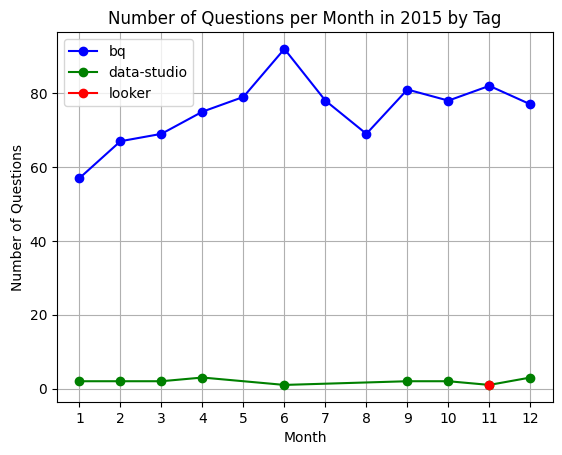

In [ ]:
# Create plot
colors = ['blue', 'green', 'red']

for i, tag in enumerate(tags):
    tag_data = df_1_grouping_2015[df_1_grouping_2015['question_tag'] == tag]
    color = colors[i % len(colors)]  # colors looping
    plt.plot(tag_data['question_created_month'], tag_data['question_id'], marker='o', label=tag, color=color)

plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions per Month in 2015 by Tag')
plt.xticks(np.arange(1, 13))
plt.legend()
plt.grid()

plt.show()

In [ ]:
df_1_grouping_2016 = df_1_grouping[df_1_grouping['question_created_year'] == 2016]

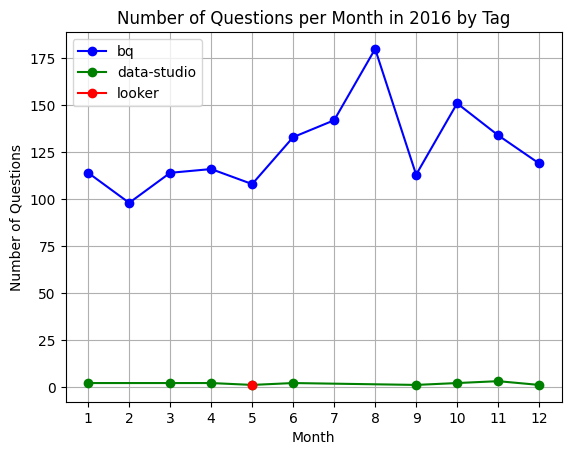

In [ ]:
# Create plot
colors = ['blue', 'green', 'red']

for i, tag in enumerate(tags):
    tag_data = df_1_grouping_2016[df_1_grouping_2016['question_tag'] == tag]
    color = colors[i % len(colors)]  # colors looping
    plt.plot(tag_data['question_created_month'], tag_data['question_id'], marker='o', label=tag, color=color)

plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions per Month in 2016 by Tag')
plt.xticks(np.arange(1, 13))
plt.legend()
plt.grid()

plt.show()

In [ ]:
df_1_grouping_2017 = df_1_grouping[df_1_grouping['question_created_year'] == 2017]

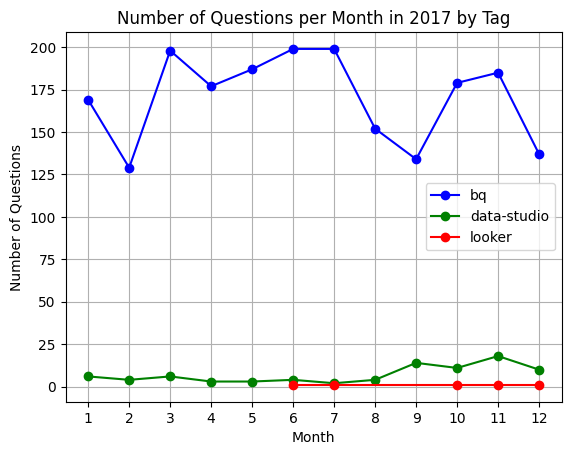

In [ ]:
# Create plot
colors = ['blue', 'green', 'red']

for i, tag in enumerate(tags):
    tag_data = df_1_grouping_2017[df_1_grouping_2017['question_tag'] == tag]
    color = colors[i % len(colors)]  # Colors loop
    plt.plot(tag_data['question_created_month'], tag_data['question_id'], marker='o', label=tag, color=color)

plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions per Month in 2017 by Tag')
plt.xticks(np.arange(1, 13))
plt.legend()
plt.grid()

plt.show()

**Final visualisation**

> According to the marketing team's request to make A single line would represent the year the question they asked. The trend should be on monthly basis.

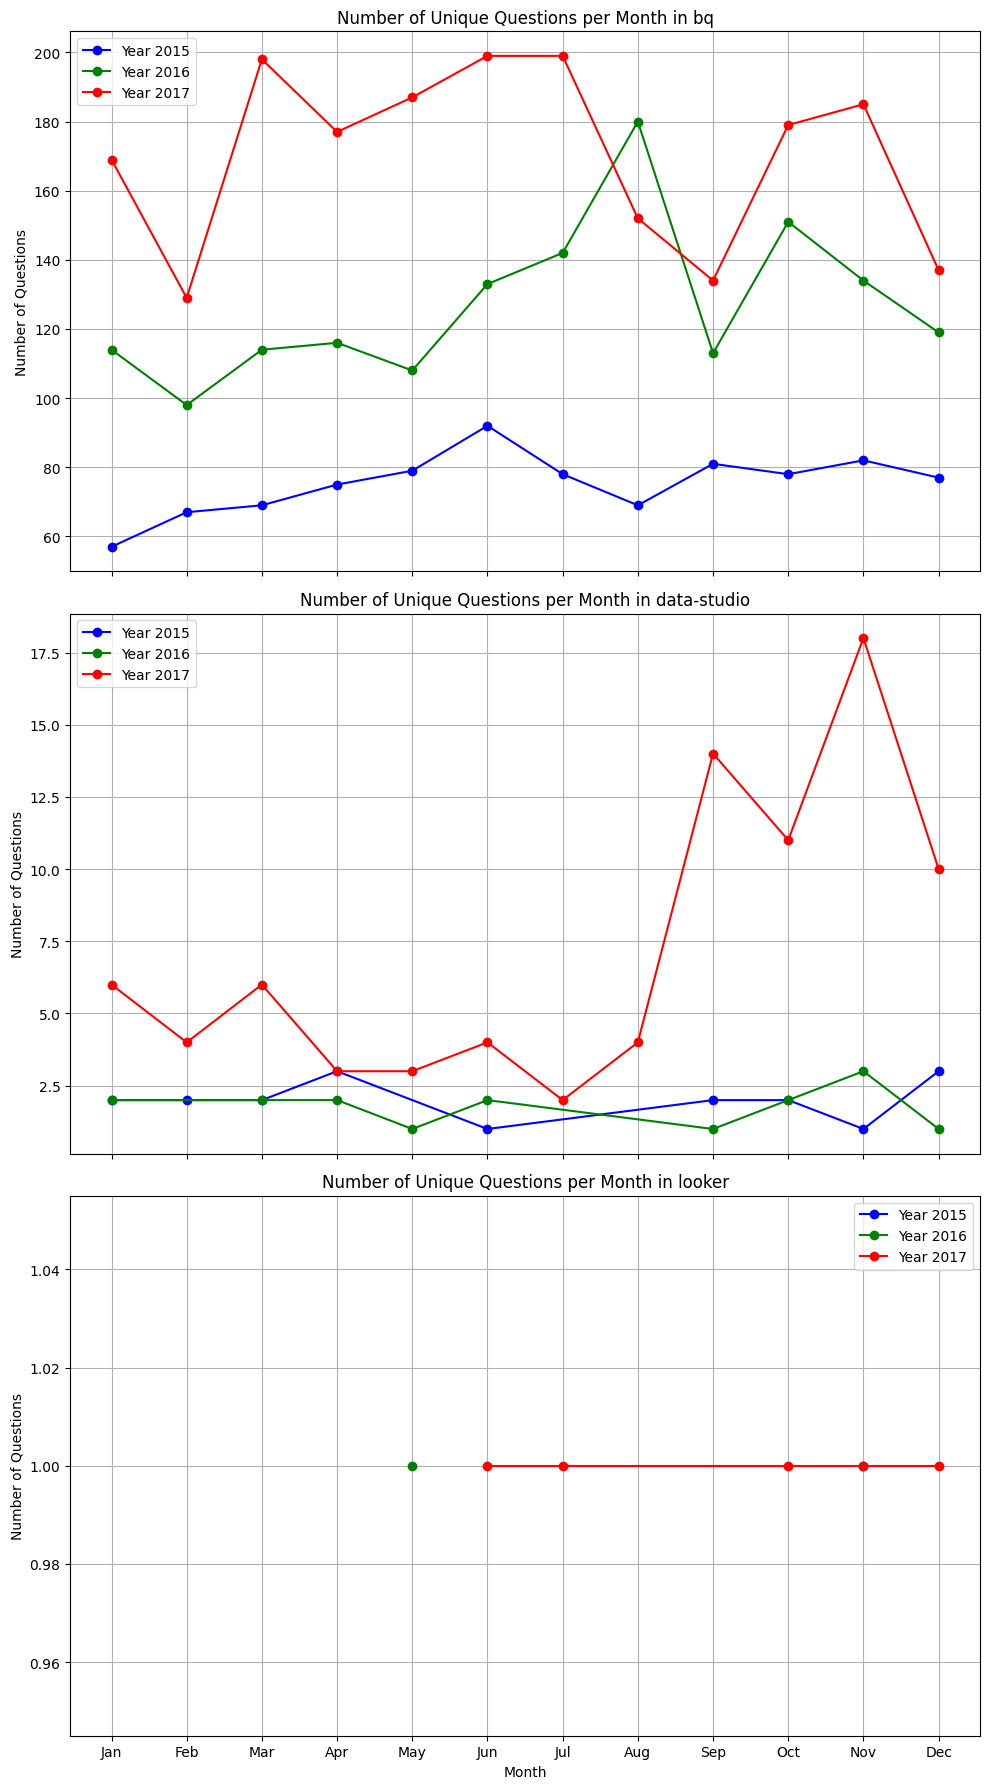

In [ ]:
# Making plots with subplots
fig, axes = plt.subplots(len(tags), 1, figsize=(10, 6 * len(tags)), sharex=True)

years = [2015, 2016, 2017]
colors = ['blue', 'green', 'red']

# Iterate through each tag and build a plot for each tag
for i, tag in enumerate(tags):
    ax = axes[i]
    ax.set_title(f'Number of Unique Questions per Month in {tag}')

    # Iterate through the years and build a plot for each year
    for j, year in enumerate(years):
        tag_data = df_1_grouping[df_1_grouping['question_created_year'] == year]
        tag_data = tag_data[tag_data['question_tag'] == tag]
        color = colors[j % len(colors)]
        ax.plot(tag_data['question_created_month'], tag_data['question_id'], marker='o', label=f'Year {year}', color=color)

    ax.set_ylabel('Number of Questions')
    ax.legend()
    ax.grid()

# Defines a label on the x-axis
plt.xticks(np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')

# Show plot
plt.tight_layout()
plt.show()

**Conclusion**

1. `bq` tag is always there every month throughout 2015 - 2017, bq tag in 2017 is always superior every month than other years, only losing in 3 months in 2016 namely in July, August and September

2. the `data-studio` tag doesn't always exist every month throughout 2015 -2017, the `data-studio` tag has the highest value in 2017 and reached its highest point in November 2017

3. `looker` tags only exist in 2016 - 2017 and are always stagnant throughout the year

> **Based on the results of the observations above, I suggest a few things to the marketing team:**

1. To make a banner with the topic `bq`, because in the last year the value has always been in the highest position of the other tags

2. If the marketing team is considering making 2 banners, then the right choice is to make `data-studio`

3.  It is not recommended to make banners related to `looker` tags because of lack of interest

##**Use case 2**

`Brand Ambassador Selection`

> Branding team wants to feature popular answer writer in
each tags for worldwide brand ambassador launch in
Youtube. They want to have at least 10 top candidates in
each tag.

> Your manager asks you to ensure that selected writers
are only the one who got their accepted answer the
most. They also never get minus score for an answer.

`Metrics` : total accepted answer per answerer userid per
tag

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   question_id              6795 non-null   int64              
 1   question_owner_user_id   6795 non-null   int64              
 2   question_owner_location  2770 non-null   object             
 3   question_title           6795 non-null   object             
 4   question_body            6795 non-null   object             
 5   question_created_date    6795 non-null   datetime64[ns, UTC]
 6   question_score           6795 non-null   int64              
 7   question_tag             6795 non-null   object             
 8   answer_id                6393 non-null   float64            
 9   answerer_user_id         6385 non-null   float64            
 10  answer_created_date      6393 non-null   datetime64[ns, UTC]
 11  answer_score             6393 

In [ ]:
# use only the required columns
df_2 = df.loc[:, ['answerer_user_id', 'answer_score', 'is_accepted_answer', 'question_tag']]

In [ ]:
df_2.head()

,answerer_user_id,answer_score,is_accepted_answer,question_tag
0,1371484.0,1.0,False,bq
1,3624307.0,1.0,False,bq
2,1371484.0,1.0,False,bq
3,428664.0,0.0,False,bq
4,3257867.0,6.0,True,bq


In [ ]:
# Find missing values
df_2.isnull()

,answerer_user_id,answer_score,is_accepted_answer,question_tag
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6790,False,False,False,False
6791,False,False,False,False
6792,False,False,False,False
6793,False,False,False,False


In [ ]:
# Sum missing values
df_2.isnull().sum()

answerer_user_id      410
answer_score          402
is_accepted_answer      0
question_tag            0
dtype: int64

Because we need the `answerer user_id` as an important parameter to see which users are actively answering questions, we decide to drop a null value

In [ ]:
df_2 = df_2.dropna(subset=['answerer_user_id'])

In [ ]:
# find duplicates
duplicate_rows_df_2 = df_2[df_2.duplicated()]
duplicate_rows_df_2

,answerer_user_id,answer_score,is_accepted_answer,question_tag
2,1371484.0,1.0,False,bq
6,1371484.0,1.0,False,bq
17,212435.0,4.0,False,bq
37,2417948.0,0.0,False,bq
43,243782.0,7.0,True,bq
...,...,...,...,...
6784,5221944.0,1.0,True,bq
6786,1002277.0,2.0,False,bq
6787,243782.0,1.0,True,bq
6790,12892553.0,0.0,False,data-studio


In [ ]:
# Find duplicates based on columns combination: 'answerer_user_id', 'answer_score', 'is_accepted_answer', 'question_tag'
column_subset = ['answerer_user_id', 'answer_score', 'is_accepted_answer', 'question_tag']
duplicate_rows = df_2[df_2.duplicated(subset=column_subset, keep=False)]

In [ ]:
# take a peek on the duplicate cases
duplicate_rows.head()

,answerer_user_id,answer_score,is_accepted_answer,question_tag
0,1371484.0,1.0,False,bq
2,1371484.0,1.0,False,bq
6,1371484.0,1.0,False,bq
7,1529673.0,1.0,False,bq
8,1952207.0,2.0,False,bq


From the existing duplicate values we can conclude that Duplicates occur because `answerer_user_id` can answer several questions and this is related to our previous data and we choose to ignore duplicate values so that our analysis is accurate

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385 entries, 0 to 6794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   answerer_user_id    6385 non-null   float64
 1   answer_score        6385 non-null   float64
 2   is_accepted_answer  6385 non-null   bool   
 3   question_tag        6385 non-null   object 
dtypes: bool(1), float64(2), object(1)
memory usage: 205.8+ KB


**Data Transformation**

In [ ]:
df_2['answerer_user_id'] = df_2['answerer_user_id'].astype(int)

In [ ]:
df_2['answer_score'] = df_2['answer_score'].astype(int)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385 entries, 0 to 6794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   answerer_user_id    6385 non-null   int64 
 1   answer_score        6385 non-null   int64 
 2   is_accepted_answer  6385 non-null   bool  
 3   question_tag        6385 non-null   object
dtypes: bool(1), int64(2), object(1)
memory usage: 205.8+ KB


In [ ]:
# Filter the author of the answer with a non-negative score
filtered_answer_score = df_2[(df_2['answer_score'] >= 0) & (df_2['is_accepted_answer'] == 1)]

In [ ]:
# Count total answers accepted per author answerer_user_id per question_tag
accepted_answer_counts = filtered_answer_score.groupby(['answerer_user_id', 'question_tag'])['is_accepted_answer'].size().reset_index()

In [ ]:
accepted_answer_counts

,answerer_user_id,question_tag,is_accepted_answer
0,4323,bq,1
1,7587,bq,1
2,12030,bq,1
3,19880,bq,4
4,22656,bq,1
...,...,...,...
527,9050301,bq,1
528,9132848,bq,1
529,9261344,data-studio,1
530,12892553,data-studio,2


In [ ]:
top_10_candidates_per_tag = accepted_answer_counts.groupby('question_tag').apply(lambda group: group.nlargest(10, 'is_accepted_answer')).reset_index(drop=True)

In [ ]:
# Add a "rank" column that shows the rank
top_10_candidates_per_tag['rank'] = top_10_candidates_per_tag.groupby('question_tag')['is_accepted_answer'].rank(ascending=False, method='first').astype(int)
rank_column = top_10_candidates_per_tag.pop('rank')
top_10_candidates_per_tag.insert(0, 'rank', rank_column)

In [ ]:
top_10_candidates_per_tag

,rank,answerer_user_id,question_tag,is_accepted_answer
0,1,5221944,bq,781
1,2,6253347,bq,203
2,3,243782,bq,169
3,4,4490873,bq,123
4,5,1002277,bq,114
5,6,132438,bq,113
6,7,2877278,bq,96
7,8,1375400,bq,57
8,9,4001094,bq,46
9,10,1366527,bq,45


**Conclusions**

**Table Ranking**

`bq` - Rank

|`rank`|`answerer_user_id`|`Total Score`|
|-|-|-|
|1|5221944|781|
|2|6253347|203|
|3|243782|169|
|4|4490873|123|
|5|1002277|114|
|6|132438|113|
|7|2877278|96|
|8|1375400|57|
|9|4001094|46|
|10|1366527|45|

`data-studio` - Rank

|`rank`|`answerer_user_id`|`Total Score`|
|-|-|-|
|1|4024072|13|
|2|3832970|6|
|3|5959625|2|
|4|12892553|2|
|5|27048|1|
|6|154640|1|
|7|154726|1|
|8|456274|1|
|9|568884|1|
|10|761212|1|

`looker` - Rank

|`rank`|`answerer_user_id`|`Total Score`|
|-|-|-|
|1|1904852|1|

> **From the table above, there are several things we can conclude**

1. Each tag has a minimum of 1 candidate to be made a brand ambassador

2. For the overall ranking, only the `bg` tag has a sizable margin over the nearest competitor

3. Tag `looker` only has 1 candidate because only 1 fulfills the requested criteria

> **From the results of the observations above, we recommend the following things to the Branding Team**

1. Even if only 1 candidate is requested per tag, we suggest taking 2 people from the `bq` tag because the demand for `bq` is greater than the other tags

2. For the data-studio tag, the Branding team, please select a user with answer_user_id = 4024072 as the brand ambassador from the `data-studio` tag

3. Even though we need 1 candidate to be the brand ambassador for each tag, I do not recommend taking the candidate from the `looker` tag because the score is only 1 and there are no competing candidates, this shows that there are not many interested people from the `looker` tag

##**Use case 3**


`User Activity Segmentation`
>Product team wants to understand the different persona of
their users based on number of question and answers they
created.

>Your manager asks you to create segmentation using
rule-based technique. The threshold determination should
be based on average of total posts (question or answer) they
created per year

>Your manager also asks to create visualization of these
segments based on year. The visualization should be a
stacked-bar-chart where each chart represents a year, the
stack will show different colors of segments for PM to
understand the trend change in yearly basis

---

`Segment Details`

| Question created |Answer created |Persona name |
|-|-|-|
|high|high|Inquisitive Guru|
|high|low|Curious Observer|
|low|high|Knowledgeable Supporter |
|low|low|Silent Spectator|

> The threshold determination should be based on
average of total posts (question or answer) they
created per year. Threshold will be different for
question and answer.

Metrics: userid count per segmentation per year
Hint: every year, the threshold change

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   question_id              6795 non-null   int64              
 1   question_owner_user_id   6795 non-null   int64              
 2   question_owner_location  2770 non-null   object             
 3   question_title           6795 non-null   object             
 4   question_body            6795 non-null   object             
 5   question_created_date    6795 non-null   datetime64[ns, UTC]
 6   question_score           6795 non-null   int64              
 7   question_tag             6795 non-null   object             
 8   answer_id                6393 non-null   float64            
 9   answerer_user_id         6385 non-null   float64            
 10  answer_created_date      6393 non-null   datetime64[ns, UTC]
 11  answer_score             6393 

In [ ]:
# use only the required columns
df_3 = df.loc[:, ['question_id','question_owner_user_id', 'question_created_date', 'answer_id', 'answerer_user_id', 'answer_created_date']]

In [ ]:
df_3.head()

,question_id,question_owner_user_id,question_created_date,answer_id,answerer_user_id,answer_created_date
0,27733458,3769827,2015-01-01 18:31:22.693000+00:00,27787398.0,1371484.0,2015-01-05 20:30:31.057000+00:00
1,27734669,2238969,2015-01-01 21:04:30.070000+00:00,27751284.0,3624307.0,2015-01-03 02:56:46.553000+00:00
2,27745803,4413122,2015-01-02 17:09:50.047000+00:00,27786830.0,1371484.0,2015-01-05 19:52:02.710000+00:00
3,27745803,4413122,2015-01-02 17:09:50.047000+00:00,27880982.0,428664.0,2015-01-10 20:38:15.840000+00:00
4,27748870,390973,2015-01-02 21:38:00.870000+00:00,27785857.0,3257867.0,2015-01-05 18:46:51.560000+00:00


In [ ]:
df_3.isnull().sum()

question_id                 0
question_owner_user_id      0
question_created_date       0
answer_id                 402
answerer_user_id          410
answer_created_date       402
dtype: int64

> Based on the null value, we can conclude that there are a number of questions that don't have answers or haven't been answered by anyone and maybe someone answered the question without going through the login process first, and it was decided to ignore it as it will have no impact on our analysis

In [ ]:
# find duplicates
duplicate_rows_df_3 = df_3[df_3.duplicated()]
duplicate_rows_df_3

,question_id,question_owner_user_id,question_created_date,answer_id,answerer_user_id,answer_created_date


In [ ]:
# Find duplicates based on columns combination: question_owner_user_id 	question_created_date 	answerer_user_id 	answer_created_date 	is_accepted_answer
column_subset = ['question_owner_user_id', 'question_created_date', 'answerer_user_id', 'answer_created_date']
duplicate_rows = df_3[df_3.duplicated(subset=column_subset, keep=False)]

In [ ]:
# take a peek on the duplicate cases
duplicate_rows.head()

,question_id,question_owner_user_id,question_created_date,answer_id,answerer_user_id,answer_created_date


**Data Transformation**

In [ ]:
df_3['question_created_year'] = df_3['question_created_date'].dt.year
df_3['answer_created_year'] = df_3['answer_created_date'].dt.year

In [ ]:
# drop columns
df_3.drop('question_created_date', axis=1, inplace=True)
df_3.drop('answer_created_date', axis=1, inplace=True)

**Looking for the Uniquer Question and All Answerer per year**

In [ ]:
# Counts the number of unique question_id per year
question_per_year = df_3.groupby('question_created_year')['question_id'].nunique().reset_index()

question_per_year = question_per_year.rename(columns={'question_id': 'unique_question_created'})

question_per_year.head()

,question_created_year,unique_question_created
0,2015,923
1,2016,1539
2,2017,2135


In [ ]:
# Counts the number of unique question owner user_id per year
question_per_user_per_year = df_3.groupby('question_created_year')['question_owner_user_id'].nunique().reset_index()

question_per_user_per_year = question_per_user_per_year.rename(columns={'question_owner_user_id': 'unique_question_user'})

question_per_user_per_year.head()

,question_created_year,unique_question_user
0,2015,504
1,2016,836
2,2017,1214


In [ ]:
# Counts the number of unique question_id per year
answer_per_year = df_3.groupby('answer_created_year')['answer_id'].size().reset_index()

answer_per_year = answer_per_year.rename(columns={'answer_id': 'answer_created'})

answer_per_year.head()

,answer_created_year,answer_created
0,2015.0,1107
1,2016.0,1964
2,2017.0,2526
3,2018.0,237
4,2019.0,200


In [ ]:
# Counts the number of unique answers user_id per year
answerer_per_user_per_year = df_3.groupby('answer_created_year')['answerer_user_id'].nunique().reset_index()

answerer_per_user_per_year =answerer_per_user_per_year.rename(columns={'answerer_user_id': 'total_unique_answerer'})

answerer_per_user_per_year.head()

,answer_created_year,total_unique_answerer
0,2015.0,275
1,2016.0,464
2,2017.0,652
3,2018.0,205
4,2019.0,170


In [ ]:
answer_per_year['answer_created_year'] = answer_per_year['answer_created_year'].astype(int)
answerer_per_user_per_year['answer_created_year'] = answerer_per_user_per_year['answer_created_year'].astype(int)

**Set threshold per year**

In [ ]:
question_treshold = question_per_year.merge(question_per_user_per_year, on='question_created_year')

In [ ]:
question_treshold['question_treshold'] = question_treshold['unique_question_created'] / question_treshold['unique_question_user']

In [ ]:
question_treshold

,question_created_year,unique_question_created,unique_question_user,question_treshold
0,2015,923,504,1.831349
1,2016,1539,836,1.840909
2,2017,2135,1214,1.758649


In [ ]:
answer_treshold = answer_per_year.merge(answerer_per_user_per_year, on='answer_created_year')

In [ ]:
answer_treshold['answer_treshold'] = answer_treshold['answer_created'] / answer_treshold['total_unique_answerer']

In [ ]:
answer_treshold

,answer_created_year,answer_created,total_unique_answerer,answer_treshold
0,2015,1107,275,4.025455
1,2016,1964,464,4.232759
2,2017,2526,652,3.874233
3,2018,237,205,1.156098
4,2019,200,170,1.176471
5,2020,158,139,1.136691
6,2021,136,124,1.096774
7,2022,65,60,1.083333


**Looking for user activity**

In [ ]:
# Counts the number of questions per user per year
total_question_per_user_per_year = df_3.groupby(['question_created_year', 'question_owner_user_id'])['question_id'].count().reset_index()

total_question_per_user_per_year = total_question_per_user_per_year.rename(columns={'question_id': 'total_question'})

total_question_per_user_per_year.head()

,question_created_year,question_owner_user_id,total_question
0,2015,0,4
1,2015,33453,2
2,2015,39827,2
3,2015,47222,2
4,2015,54247,1


In [ ]:
# Counts the number of answers per user per year
total_answer_per_user_per_year = df_3.groupby(['answer_created_year', 'answerer_user_id'])['answer_id'].count().reset_index()

total_answer_per_user_per_year = total_answer_per_user_per_year.rename(columns={'answer_id': 'total_answer'})

total_answer_per_user_per_year.head()

,answer_created_year,answerer_user_id,total_answer
0,2015.0,4279.0,1
1,2015.0,7587.0,1
2,2015.0,12030.0,1
3,2015.0,18601.0,1
4,2015.0,19880.0,4


In [ ]:
total_answer_per_user_per_year['answer_created_year'] = total_answer_per_user_per_year['answer_created_year'].astype(int)
total_answer_per_user_per_year['answerer_user_id'] = total_answer_per_user_per_year['answerer_user_id'].astype(int)

**Looking For Users Activity Rate**

In [ ]:
# Merge the threshold column with the DataFrame total questions per_user_per year
user_question_activity = total_question_per_user_per_year.merge(question_treshold, on='question_created_year')

# Creates new columns based on conditions
user_question_activity['Question created'] = np.where(user_question_activity['total_question'] >= user_question_activity['question_treshold'], 'high', 'low')

# Rename column
user_question_activity = user_question_activity.rename(columns={'question_owner_user_id': 'user_id'})

# show 5 data
user_question_activity.head()

,question_created_year,user_id,total_question,unique_question_created,unique_question_user,question_treshold,Question created
0,2015,0,4,923,504,1.831349,high
1,2015,33453,2,923,504,1.831349,high
2,2015,39827,2,923,504,1.831349,high
3,2015,47222,2,923,504,1.831349,high
4,2015,54247,1,923,504,1.831349,low


In [ ]:
user_question_activity.drop(columns='unique_question_created', inplace=True)
user_question_activity.drop(columns='unique_question_user' , inplace=True)

In [ ]:
# Merge the threshold column with the DataFrame total answers per_user_per year
user_answer_activity = total_answer_per_user_per_year.merge(answer_treshold, on='answer_created_year')

# Creates new columns based on conditions
user_answer_activity['Answer created'] = np.where(user_answer_activity['total_answer'] >= user_answer_activity['answer_treshold'], 'high', 'low')

# Rename column
user_answer_activity = user_answer_activity.rename(columns={'answerer_user_id': 'user_id'})

# show 5 data
user_answer_activity.head()

,answer_created_year,user_id,total_answer,answer_created,total_unique_answerer,answer_treshold,Answer created
0,2015,4279,1,1107,275,4.025455,low
1,2015,7587,1,1107,275,4.025455,low
2,2015,12030,1,1107,275,4.025455,low
3,2015,18601,1,1107,275,4.025455,low
4,2015,19880,4,1107,275,4.025455,low


In [ ]:
user_answer_activity.drop(columns='answer_created', inplace=True)
user_answer_activity.drop(columns='total_unique_answerer' , inplace=True)

**Looking For Users Persona**

In [ ]:
user_question_activity.head()

,question_created_year,user_id,total_question,question_treshold,Question created
0,2015,0,4,1.831349,high
1,2015,33453,2,1.831349,high
2,2015,39827,2,1.831349,high
3,2015,47222,2,1.831349,high
4,2015,54247,1,1.831349,low


In [ ]:
user_answer_activity.head()

,answer_created_year,user_id,total_answer,answer_treshold,Answer created
0,2015,4279,1,4.025455,low
1,2015,7587,1,4.025455,low
2,2015,12030,1,4.025455,low
3,2015,18601,1,4.025455,low
4,2015,19880,4,4.025455,low


In [ ]:
users_persona = user_question_activity.merge(user_answer_activity, on='user_id')

In [ ]:
users_persona = users_persona.loc[:, ['question_created_year', 'answer_created_year', 'user_id', 'Question created', 'Answer created']]

In [ ]:
users_persona

,question_created_year,answer_created_year,user_id,Question created,Answer created
0,2015,2016,33453,high,low
1,2015,2018,33453,high,low
2,2017,2016,33453,high,low
3,2017,2018,33453,high,low
4,2015,2015,79669,high,low
...,...,...,...,...,...
751,2017,2017,8818869,high,low
752,2017,2017,8875843,low,low
753,2017,2017,8952827,high,low
754,2017,2017,9132848,high,low


In [ ]:
persona = [
    (users_persona['Question created'] == 'high') & (users_persona['Answer created'] == 'high'),
    (users_persona['Question created'] == 'high') & (users_persona['Answer created'] == 'low'),
    (users_persona['Question created'] == 'low') & (users_persona['Answer created'] == 'high'),
    (users_persona['Question created'] == 'low') & (users_persona['Answer created'] == 'low')
]

persona_name = [
    'Inquisitive Guru',
    'Curious Observer',
    'Knowledgeable Supporter',
    'Silent Spectator'
]

In [ ]:
users_persona['Persona name'] = np.select(persona, persona_name, default='Unknown')

In [ ]:
users_persona

,question_created_year,answer_created_year,user_id,Question created,Answer created,Persona name
0,2015,2016,33453,high,low,Curious Observer
1,2015,2018,33453,high,low,Curious Observer
2,2017,2016,33453,high,low,Curious Observer
3,2017,2018,33453,high,low,Curious Observer
4,2015,2015,79669,high,low,Curious Observer
...,...,...,...,...,...,...
751,2017,2017,8818869,high,low,Curious Observer
752,2017,2017,8875843,low,low,Silent Spectator
753,2017,2017,8952827,high,low,Curious Observer
754,2017,2017,9132848,high,low,Curious Observer


To determine the persona's year, I used the highest value in the `question_created_year` and `answer_created_year` columns because users personas can only be defined when they have an `Answer created`

In [ ]:
# Using the numpy.maximum function to choose the largest value between the 'question_created_year' and 'answer_created_year' columns
users_persona['year'] = np.maximum(users_persona['question_created_year'], users_persona['answer_created_year'])

In [ ]:
users_persona = users_persona.loc[:, ['year', 'user_id', 'Question created', 'Answer created', 'Persona name']]

In [ ]:
users_persona

,year,user_id,Question created,Answer created,Persona name
0,2016,33453,high,low,Curious Observer
1,2018,33453,high,low,Curious Observer
2,2017,33453,high,low,Curious Observer
3,2018,33453,high,low,Curious Observer
4,2015,79669,high,low,Curious Observer
...,...,...,...,...,...
751,2017,8818869,high,low,Curious Observer
752,2017,8875843,low,low,Silent Spectator
753,2017,8952827,high,low,Curious Observer
754,2017,9132848,high,low,Curious Observer


In [ ]:
users_persona.drop_duplicates(subset=['year', 'user_id'], inplace=True)

In [ ]:
users_persona.drop(columns='user_id', inplace=True)

In [ ]:
users_persona.head()

,year,Question created,Answer created,Persona name
0,2016,high,low,Curious Observer
1,2018,high,low,Curious Observer
2,2017,high,low,Curious Observer
4,2015,high,low,Curious Observer
5,2015,high,low,Curious Observer


In [ ]:
total_persona_per_year = users_persona.groupby(['year', 'Persona name']).size().reset_index()

In [ ]:
total_persona_per_year = pd.DataFrame(total_persona_per_year).rename(columns={0 : 'Total Persona'})

In [ ]:
total_persona_per_year

,year,Persona name,Total Persona
0,2015,Curious Observer,66
1,2015,Inquisitive Guru,10
2,2015,Knowledgeable Supporter,2
3,2015,Silent Spectator,14
4,2016,Curious Observer,114
5,2016,Inquisitive Guru,18
6,2016,Knowledgeable Supporter,1
7,2016,Silent Spectator,49
8,2017,Curious Observer,178
9,2017,Inquisitive Guru,17


**Make stacked barcharts**

In [ ]:
pivot_table = total_persona_per_year.pivot_table(index='year', columns='Persona name', values='Total Persona', aggfunc='sum', fill_value=0)

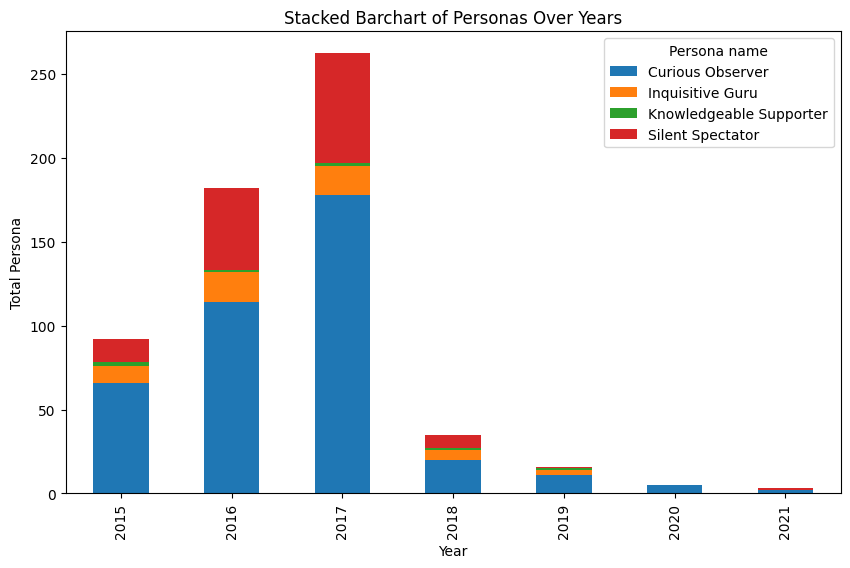

In [ ]:
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Persona')
plt.title('Stacked Barchart of Personas Over Years')
plt.legend(title='Persona name')
plt.show()

**Conclusions**
> **From the results above, the following are some of the observations that I can conclude:**

1. Users Persona is mostly occupied by `Curious Observer`
2. `Silent Spectator` takes second place on the list
3. In 2020 and 2021 not all user personas will be registered

> **Here are some recommendations for the product team:**

1. To prioritize products for use by `Curious Observer`
2. As a backup plan, to think of a product for the `Silent Spectator`

# **Part 03 : Export Jupyter Notebook to HTML**

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html sample_data/GG3DAUP0082_Python.ipynb

[NbConvertApp] Converting notebook sample_data/GG3DAUP0082_Python.ipynb to html
[NbConvertApp] Writing 1456265 bytes to sample_data/GG3DAUP0082_Python.html
